In [1]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-05-18 03:37:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  76.5MB/s    in 5.4s    

2025-05-18 03:37:37 (92.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in  '{dirpath}'.")

There are 2 directories and 0 images in  '10_food_classes_all_data'.
There are 10 directories and 0 images in  '10_food_classes_all_data/test'.
There are 0 directories and 250 images in  '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in  '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in  '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in  '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in  '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in  '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in  '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in  '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in  '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in  '10_food_classes_all_data/test/ramen'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape:{img.shape}")
  return img

In [4]:
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [5]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 May 18 03:37 .
drwxr-xr-x  1 root root 4096 May 18 03:37 ..
drwxr-xr-x 12 root root 4096 May 18 03:37 test
drwxr-xr-x 12 root root 4096 May 18 03:37 train


In [6]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [7]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['765799.jpg']
Image shape:(512, 511, 3)


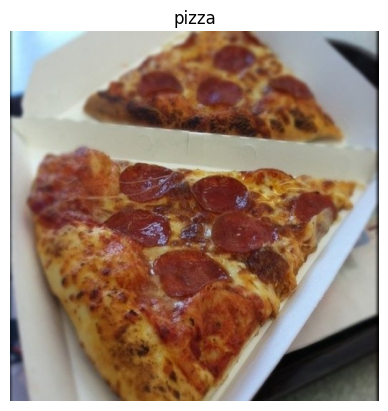

In [8]:
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

test_data=test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation

model1=Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model1.compile(loss="categorical_crossentropy",
               optimizer="Adam",
               metrics=["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history1=model1.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 134ms/step - accuracy: 0.1707 - loss: 2.2349 - val_accuracy: 0.2772 - val_loss: 2.0068
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - accuracy: 0.3363 - loss: 1.9092 - val_accuracy: 0.3472 - val_loss: 1.8971
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - accuracy: 0.4824 - loss: 1.5415 - val_accuracy: 0.3372 - val_loss: 1.9480
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.6982 - loss: 0.9494 - val_accuracy: 0.2912 - val_loss: 2.5133
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 118ms/step - accuracy: 0.8846 - loss: 0.3891 - val_accuracy: 0.2764 - val_loss: 3.5918


In [12]:
model1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.2761 - loss: 3.5820


[3.5918378829956055, 0.27639999985694885]

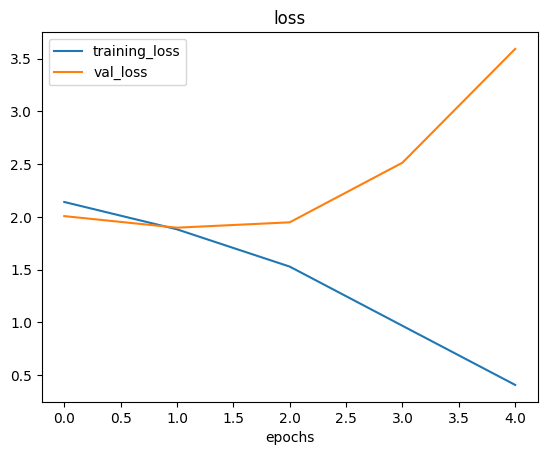

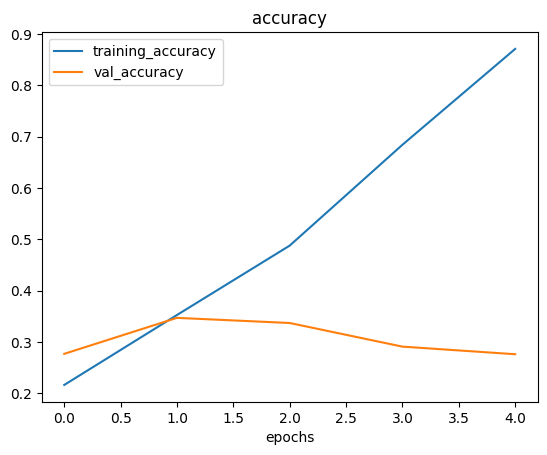

In [13]:
plot_loss_curves(history1)

In [14]:
model2=Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
     MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model2.compile(loss="categorical_crossentropy",
               optimizer="Adam",
               metrics=["accuracy"])

In [15]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       291,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,800 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history2=model2.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 119ms/step - accuracy: 0.1965 - loss: 2.2136 - val_accuracy: 0.3060 - val_loss: 1.9504
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 129ms/step - accuracy: 0.3614 - loss: 1.8319 - val_accuracy: 0.3732 - val_loss: 1.8141
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 109ms/step - accuracy: 0.4636 - loss: 1.5743 - val_accuracy: 0.3476 - val_loss: 1.8256
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.6022 - loss: 1.2704 - val_accuracy: 0.3448 - val_loss: 1.9634
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 126ms/step - accuracy: 0.7403 - loss: 0.8605 - val_accuracy: 0.3592 - val_loss: 2.0360


In [17]:
model2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.2638 - loss: 3.5491


[3.5918378829956055, 0.27639999985694885]

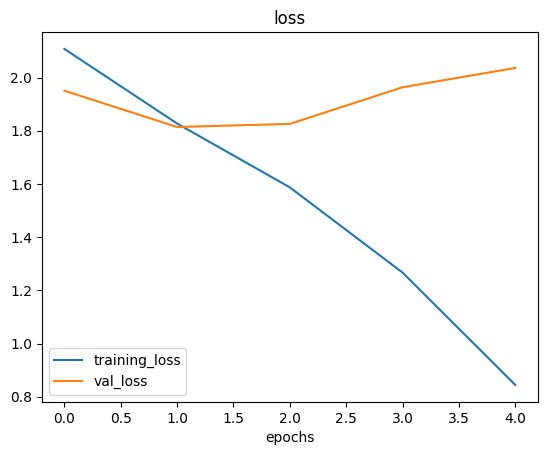

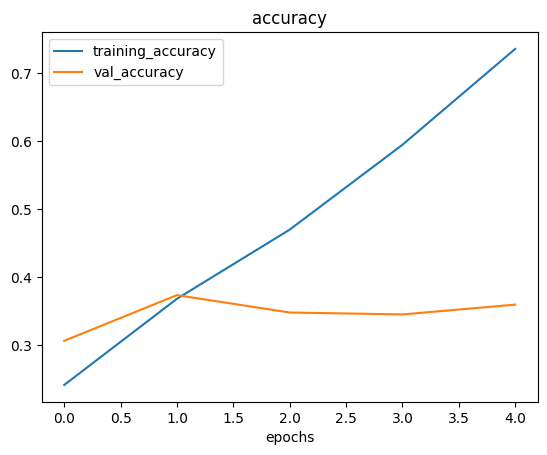

In [18]:
plot_loss_curves(history2)

In [19]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [20]:
images,labels=next(train_data)
augmented_images,augmented_labels=next(train_data_augmented)

showing image number:29


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

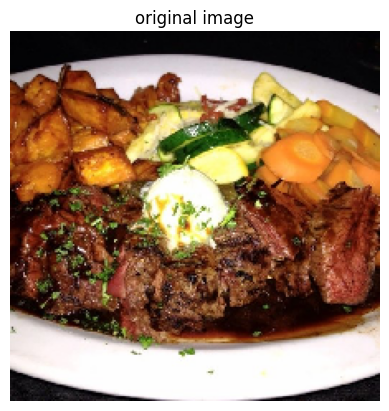

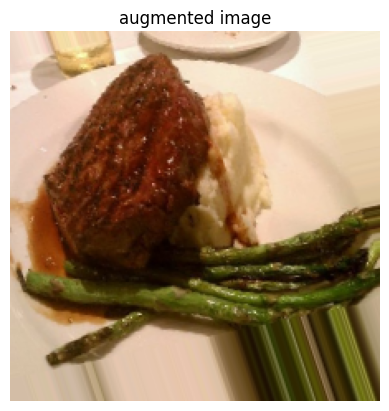

In [21]:
random_number=random.randint(0,31)
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

In [22]:
print("use augmentented data for model 1 and 2")


use augmentented data for model 1 and 2


In [23]:
model3=tf.keras.models.clone_model(model1)
model3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])



In [24]:
history3=model3.fit(train_data_augmented,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented),
                    validation_data=test_data,
                    validation_steps=len(test_data))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 112s 464ms/step - accuracy: 0.1255 - loss: 2.3099 - val_accuracy: 0.2308 - val_loss: 2.1495
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 162s 556ms/step - accuracy: 0.1822 - loss: 2.1991 - val_accuracy: 0.2500 - val_loss: 2.0996
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 111s 473ms/step - accuracy: 0.2159 - loss: 2.1409 - val_accuracy: 0.2940 - val_loss: 1.9626
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 463ms/step - accuracy: 0.2709 - loss: 2.0544 - val_accuracy: 0.3124 - val_loss: 1.9371
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 107s 457ms/step - accuracy: 0.2694 - loss: 2.0467 - val_accuracy: 0.3432 - val_loss: 1.8929


In [25]:
model3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.3439 - loss: 1.8961


[1.8929262161254883, 0.3431999981403351]

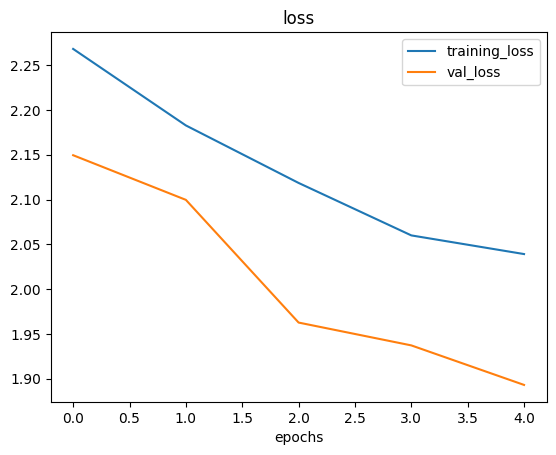

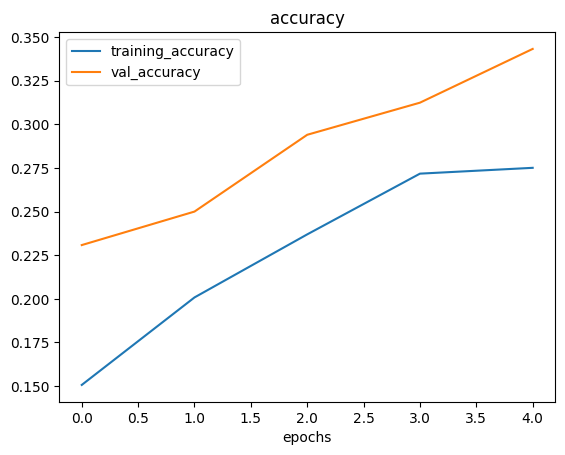

In [26]:
plot_loss_curves(history3)

In [27]:
history4=model3.fit(train_data_augmented,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented),
                    validation_data=test_data,
                    validation_steps=len(test_data))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 112s 478ms/step - accuracy: 0.2904 - loss: 2.0085 - val_accuracy: 0.3808 - val_loss: 1.7993
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 135s 450ms/step - accuracy: 0.3099 - loss: 1.9746 - val_accuracy: 0.3564 - val_loss: 1.8112
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 449ms/step - accuracy: 0.3189 - loss: 1.9589 - val_accuracy: 0.3912 - val_loss: 1.8341
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 120s 510ms/step - accuracy: 0.3385 - loss: 1.9057 - val_accuracy: 0.4292 - val_loss: 1.7102
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 130s 555ms/step - accuracy: 0.3437 - loss: 1.8805 - val_accuracy: 0.4100 - val_loss: 1.6936


In [28]:
model3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.4051 - loss: 1.7039


[1.6935503482818604, 0.4099999964237213]

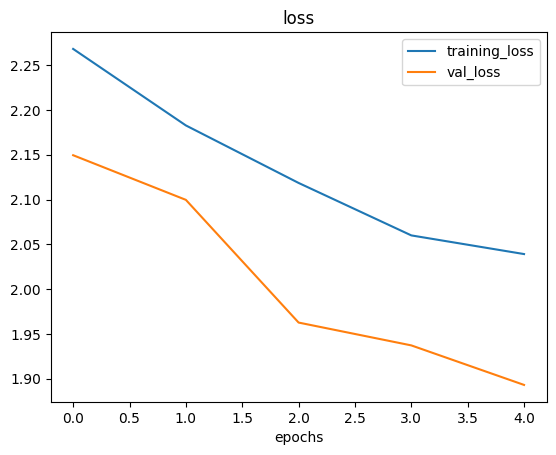

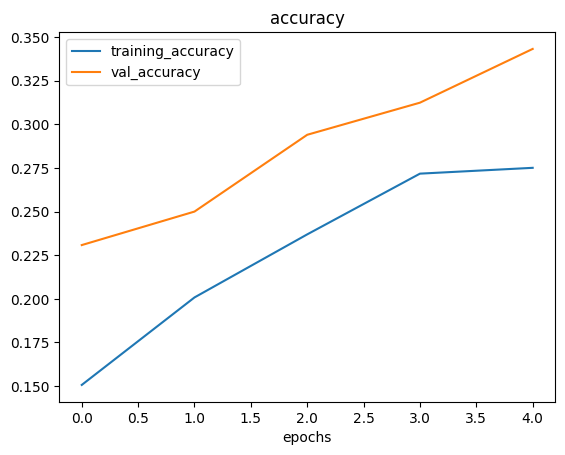

In [29]:
plot_loss_curves(history3)

In [30]:
model4=tf.keras.models.clone_model(model2)
model4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])



In [31]:
history5=model4.fit(train_data_augmented,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented),
                    validation_data=test_data,
                    validation_steps=len(test_data))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 118s 489ms/step - accuracy: 0.1304 - loss: 2.3174 - val_accuracy: 0.2612 - val_loss: 2.0741
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 133s 455ms/step - accuracy: 0.2482 - loss: 2.1052 - val_accuracy: 0.3172 - val_loss: 1.9217
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 454ms/step - accuracy: 0.2858 - loss: 2.0224 - val_accuracy: 0.3104 - val_loss: 1.9656
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 455ms/step - accuracy: 0.2963 - loss: 1.9923 - val_accuracy: 0.3140 - val_loss: 2.0029
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 462ms/step - accuracy: 0.3116 - loss: 1.9577 - val_accuracy: 0.3780 - val_loss: 1.8266


In [32]:
model4.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.3763 - loss: 1.8064


[1.8266412019729614, 0.3779999911785126]

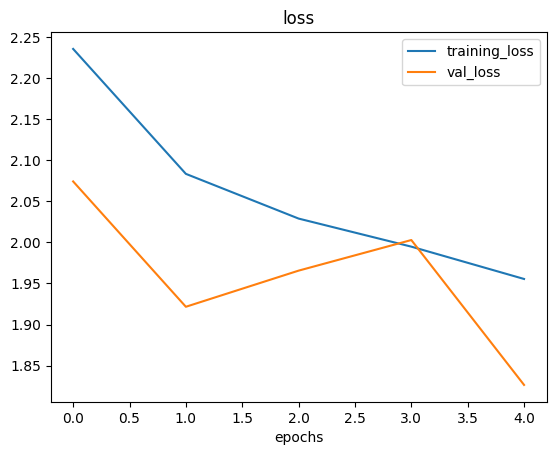

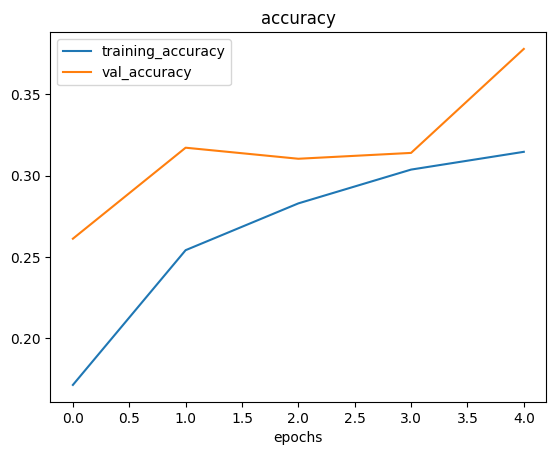

In [33]:
plot_loss_curves(history5)

In [34]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [35]:
def load_and_prep_image(filename,img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  return img

In [41]:
def pred_and_plot(model, filename, class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))

    pred_class = class_names[tf.argmax(pred[0]).numpy()]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()


--2025-05-18 04:18:28--  https://raw.githubusercontent.com/snehilkumbhani/tensorflow/refs/heads/main/steak.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13646 (13K) [image/jpeg]
Saving to: ‘steak.jpg’

steak.jpg           100%[===================>]  13.33K  --.-KB/s    in 0s      

2025-05-18 04:18:28 (92.5 MB/s) - ‘steak.jpg’ saved [13646/13646]



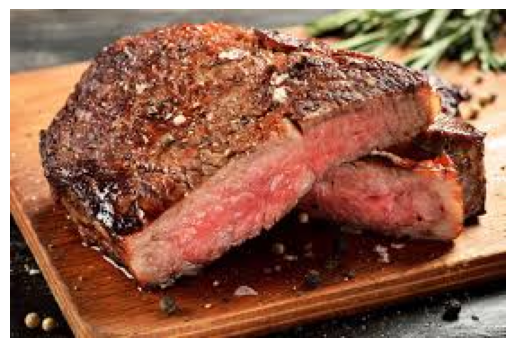

In [38]:
!wget https://raw.githubusercontent.com/snehilkumbhani/tensorflow/refs/heads/main/steak.jpg


steak1 = mpimg.imread("steak.jpg")
plt.imshow(steak1)
plt.axis(False)
plt.show()

In [39]:
steak1=load_and_prep_image("steak.jpg")
steak1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.59562325, 0.54464287, 0.48189774],
        [0.5880602 , 0.5370798 , 0.47433475],
        [0.57811624, 0.52713585, 0.46439075],
        ...,
        [0.09993058, 0.10941928, 0.02808144],
        [0.08371858, 0.09548328, 0.02097348],
        [0.08928557, 0.10105028, 0.02654048]],

       [[0.54692996, 0.49594957, 0.43320447],
        [0.5368522 , 0.48587185, 0.42312676],
        [0.5236062 , 0.47262576, 0.40988067],
        ...,
        [0.0567999 , 0.06390107, 0.00770986],
        [0.04945273, 0.05552766, 0.00575834],
        [0.06805032, 0.07412525, 0.00980141]],

       [[0.52612734, 0.47727412, 0.41452903],
        [0.5124771 , 0.46362382, 0.40087873],
        [0.4953604 , 0.44650713, 0.383762  ],
        ...,
        [0.04081856, 0.03940031, 0.        ],
        [0.03158459, 0.02912485, 0.        ],
        [0.0536323 , 0.05117256, 0.00158615]],

       ...,

       [[0.12188179, 0.11796023, 0.10227396],
        [0.17

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


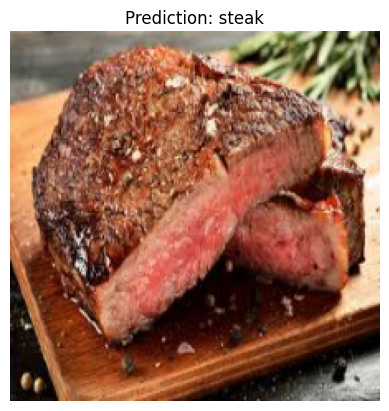

In [48]:
pred_and_plot(model4,"steak.jpg",class_names=class_names)

In [50]:
model4.save("saved_cate_model.h5")


In [52]:
model4.save("saved_cate_model.h5")

loaded_model4 = tf.keras.models.load_model("saved_cate_model.h5")
loaded_model4.evaluate(test_data)


79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.3689 - loss: 1.8365


[1.82664155960083, 0.3779999911785126]

In [53]:
model4.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.3834 - loss: 1.8086


[1.8266409635543823, 0.3779999911785126]